In [0]:
#Importing Libraries
import pandas as pd 
import numpy as np
import re
import nltk
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve,precision_score,recall_score,f1_score
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

In [0]:
#Loading Data
data_url = '/content/movie_data.csv'
df = pd.read_csv(data_url)
np.set_printoptions(precision=2)

In [0]:
#Preprocessing Data
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub(r'[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text
df['review'] = df['review'].apply(preprocessor)

In [0]:
#Tokenizing
porter = PorterStemmer()
stop = stopwords.words('english')
def tokenizer_porter(text):
	return [porter.stem(word) for word in text.split() if word not in stop ]

In [0]:
#Transform text data into TF-IDF Vectors
tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,
                        tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y = df.sentiment.values
x = tfidf.fit_transform(df.review)

In [0]:
#Logistic Regression
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)
model = LogisticRegressionCV(cv=5,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=300)
model.fit(x_train,y_train)
saved_model=open('saved_model.sav','wb')
pickle.dump(model,saved_model)
saved_model.close()

In [0]:
#Load trained model
filename = '/content/saved_model.sav'
saved_clf = pickle.load(open(filename,'rb'))

In [43]:
#Results
accuracy = saved_clf.score(x_test,y_test).round(3)
y_pred = saved_clf.predict(x_test)
precision = precision_score(y_test,y_pred).round(3)
recall = recall_score(y_test,y_pred).round(3)
f_score = (2*precision*recall/(precision+recall)).round(3)
print("Accuracy: ",accuracy)
print("Precion: ",precision)
print("Recall: ",recall)
print("F1-Score: ",f_score)


Accuracy:  0.895
Precion:  0.889
Recall:  0.902
F1-Score:  0.895


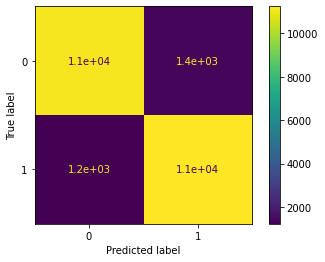

In [24]:
#Confusion Matrix
plot_confusion_matrix(saved_clf,x_test,y_test)

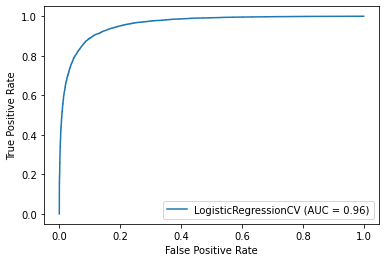

In [25]:
#ROC Curve
plot_roc_curve(saved_clf,x_test,y_test)

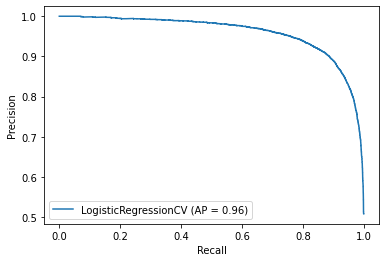

In [26]:
#Precion-Recall Curve
plot_precision_recall_curve(saved_clf,x_test,y_test)